In [223]:
# Imports
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import scipy.signal
import scipy.stats
from scipy.special import erfcinv

%config InlineBackend.figure_format = 'svg'

In [238]:
# Normal with log-normal variance distribution
class NLNV(scipy.stats.rv_continuous):
    def _pdf(self, v, lnvmu, lnvsigma):
        print("pdf")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.pdf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _cdf(self, v, lnvmu, lnvsigma):
        print("cdf")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.cdf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _ppf_prevec(self, v, lnvmu, lnvsigma):
        print("ppf_prevec")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.ppf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _ppf(self, v, lnvmu, lnvsigma):
        print("ppf")
        return np.vectorize(self._ppf_prevec)(v, lnvmu, lnvsigma)
    def _sf(self, v, lnvmu, lnvsigma):
        print("sf")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.sf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _isf(self, v, lnvmu, lnvsigma):
        print("isf")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.isf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _argcheck(self, lnvmu, lnvsigma):
        return lnvsigma > 0

ppf
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_pr

((array([ 8.38648765,  8.94842016,  9.27335205,  9.5085659 ,  9.69611629,
          9.85380712,  9.99092764, 10.11296742, 10.2234537 , 10.32479388,
         10.41870803, 10.50647011, 10.58905145, 10.66721062, 10.74155208,
         10.8125658 , 10.88065495, 10.94615557, 11.00935097, 11.07048252,
         11.12975769, 11.18735633, 11.24343556, 11.29813357, 11.3515727 ,
         11.40386191, 11.45509882, 11.50537131, 11.55475892, 11.603334  ,
         11.65116264, 11.6983055 , 11.74481848, 11.79075334, 11.83615818,
         11.88107789, 11.92555456, 11.96962777, 12.01333492, 12.0567115 ,
         12.09979127, 12.14260657, 12.18518841, 12.22756671, 12.26977043,
         12.31182774, 12.35376613, 12.39561257, 12.43739362, 12.47913555,
         12.52086445, 12.56260638, 12.60438743, 12.64623387, 12.68817226,
         12.73022957, 12.77243329, 12.81481159, 12.85739343, 12.90020873,
         12.9432885 , 12.98666508, 13.03037223, 13.07444544, 13.11892211,
         13.16384182, 13.20924666, 13.

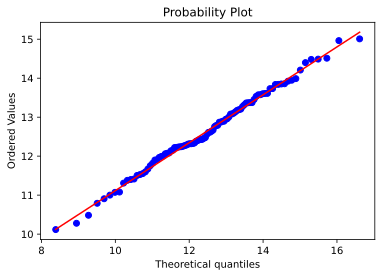

In [242]:
# Test fit function
samps = np.random.normal(12.5, 1, 100)
scipy.stats.probplot(samps, sparams=(-3.5, 2, 12.5), dist=NLNV(), plot=plt, fit=True)

# Normal distribution with log-normal variance (NLNV)

In [ ]:
# Test lnc_ppf
p = np.linspace(0, 1, 100)
plt.plot(p, lnc_ppf(p, 1, -3.5, 2, 12.5, 10**6))
plt.plot(p, lnc_ppf(p, 10, -3.5, 2, 12.5, 10**6))
plt.plot(p, lnc_ppf(p, 100, -3.5, 2, 12.5, 10**6))
plt.plot(p, lnc_ppf(p, 1000, -3.5, 2, 12.5, 10**6))

In [ ]:
# Test fit function
samps = np.random.normal(12, 1, 1000)
class LNCDist(scipy.stats.rv_continuous):
    def _ppf(self, p):
        lnc_ppf(p, 1, -3.5, 2, 12.5, 10**6)
        
scipy.stats.probplot(samps, dist=LNCDist(), plot=plt)

### Appendix: Replacement Rules for Mathematica Integrand
E^ -> np.exp

\[Mu] -> mu

\[Sigma] -> sigma

\[Pi] -> np.pi

Log\[([^\]]*)\] -> np.log($1)

Sqrt\[([^\]]*)\] -> np.sqrt($1)

InverseErfc\[([^\]]*)\] -> erfcinv($1)

2  -> 2*

x  -> x * 

np\.pi  -> np.pi *

fs t -> fs * t

\) \( -> ) * (

\^ -> **

```
(E^(-((-\[Mu] + Log[x])^2/(
  2 \[Sigma]^2))) (g0 - 
   Sqrt[2] InverseErfc[2 p] Sqrt[x Log[fs t]]))/(Sqrt[
 2 \[Pi]] x \[Sigma])
```